In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
df=pd.read_csv(r'C:\Users\naman\Downloads\spam.csv',encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
s=df.loc[(df.v1=='spam')]
s.describe()

,v1,v2
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


In [6]:
df['length']=df['v2'].apply(len)

In [7]:
df

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [8]:
df['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

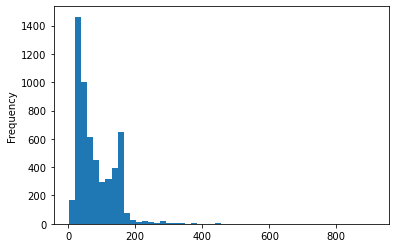

In [9]:
df['length'].plot(bins=50,kind='hist')

In [10]:
df[df['length']==200]['v2'].iloc[0]

'Open rebtel with firefox. When it loads just put plus sign in the user name place, and it will show you two numbers. The lower number is my number. Once you pick that number the pin will display okay!'

In [11]:
df['v2']=df['v2'].str.lower()
df.head()

,v1,v2,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


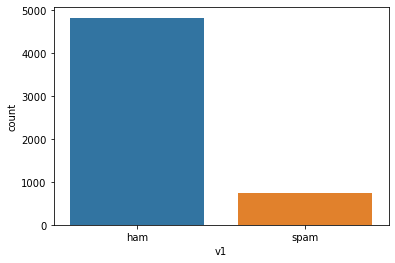

In [12]:
sns.countplot(df['v1'])

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
corpus=[]
ps=PorterStemmer()
lm=WordNetLemmatizer()

In [15]:
for i in range(0,df.shape[0]):
    msg=re.sub('[^a-zA-Z]',' ',string=df.v2[i])
    msg=msg.lower()
    message=msg.split()
    words=[word for word in message if word not in set(stopwords.words('english'))]
    words=[ps.stem(word) for word in words]
    words=[lm.lemmatize(word) for word in words]
    msgs=' '.join(words)
    corpus.append(msgs)

In [16]:
corpus[0:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [17]:
tfid=TfidfVectorizer(max_features=3000)
x=tfid.fit_transform(corpus).toarray()

In [18]:
y=pd.get_dummies(df['v1'],drop_first=True)
y=np.array(y)

In [19]:
df.iloc[:,0]

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [20]:
import pickle
tf=pickle.dump(tfid,open('tfid.pkl','wb'))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.3)
classifier.fit(X_train, y_train)

C:\Users\naman\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB(alpha=0.3)

In [22]:
pred=classifier.predict(X_test)

In [23]:
acc=accuracy_score(pred,y_test)
print(acc)

0.9820627802690582


In [24]:
cl=classification_report(pred,y_test)

In [25]:
print(cl)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       967
           1       0.89      0.99      0.94       148

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [26]:
pickle.dump(classifier, open('spam.pkl', 'wb'))

In [27]:
y.tolist()

[[0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1]

In [28]:
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve

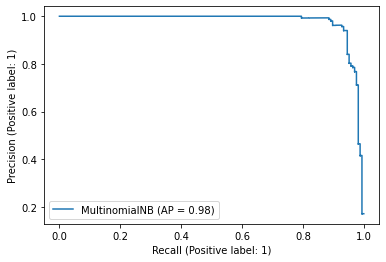

In [29]:
plot_precision_recall_curve(classifier,X_test,y_test)

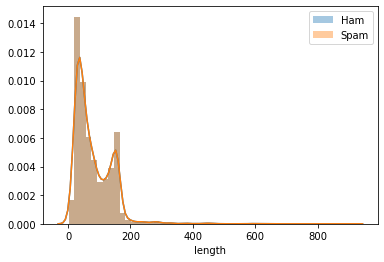

In [31]:
spam0 = df[df['v1'] == 'ham']
spam1 = df[df['v1'] == 'spam']
sns.distplot(df['length'])
sns.distplot(df['length'])
plt.legend(['Ham', 'Spam'])